# HR Analytics - Understanding the Attrition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.isna().sum().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Encoding some data
- Since object type variables are not ordinal, we can use label encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
data1 = le.fit_transform(data['Attrition'])
data['Attrition'] = data1

data2 = le.fit_transform(data['BusinessTravel'])
data['BusinessTravel'] = data2

data3 = le.fit_transform(data['Department'])
data['Department'] = data3

data4 = le.fit_transform(data['EducationField'])
data['EducationField'] = data4

data5 = le.fit_transform(data['Gender'])
data['Gender'] = data5

data6 = le.fit_transform(data['JobRole'])
data['JobRole'] = data6

data7 = le.fit_transform(data['MaritalStatus'])
data['MaritalStatus'] = data7

data8 = le.fit_transform(data['Over18'])
data['Over18'] = data8

data9 = le.fit_transform(data['OverTime'])
data['OverTime'] = data9

In [7]:
data.describe().MonthlyIncome

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

### Let's identify and delete unnecessary columns

In [8]:
# finding correlation of features with target using corrwith
corr = data.drop('Attrition', axis = 1).corrwith(data.Attrition)
corr

Age                        -0.159205
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
T

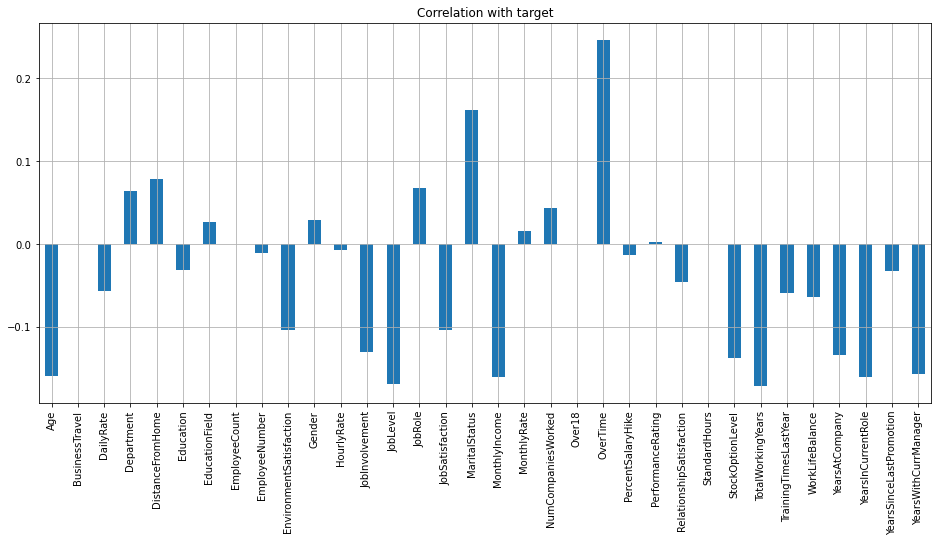

In [9]:
# Visualize the correlation
corr.plot(kind = 'bar', grid = True, figsize = (16,7),
          title = "Correlation with target")
plt.show()

In [10]:
data = data.drop(columns = ['BusinessTravel','EmployeeCount','EmployeeNumber','Over18','StandardHours'])
data.shape

(1470, 30)

### Check if dataset is imbalanced


In [11]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Data is clearly imbalanced. Need to do SMOTE

In [14]:
#conda update -n base -c defaults conda

In [18]:
x = data.drop('Attrition',axis = 1)
y = data.Attrition

In [20]:
from collections import Counter
Counter(y_train)

Counter({0: 927, 1: 175})

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 56)

#sm = SMOTE()
ove_smp = SMOTE(0.75)

x_train_ns, y_train_ns, = ove_smp.fit_sample(x_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 927, 1: 175})
The number of classes after fit Counter({0: 927, 1: 695})


### Let's select best features to build our model

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

best_features = SelectKBest(score_func = f_classif, k = 20)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature name', 'Score']

print(feature_scores.nlargest(20,'Score'))

                Feature name      Score
17                  OverTime  94.656457
22         TotalWorkingYears  44.252491
10                  JobLevel  43.215344
13             MaritalStatus  39.599763
26        YearsInCurrentRole  38.838303
14             MonthlyIncome  38.488819
0                        Age  38.175887
28      YearsWithCurrManager  36.712311
21          StockOptionLevel  28.140501
25            YearsAtCompany  27.001624
9             JobInvolvement  25.241985
12           JobSatisfaction  15.890004
6    EnvironmentSatisfaction  15.855209
3           DistanceFromHome   8.968277
11                   JobRole   6.649672
2                 Department   6.035877
24           WorkLifeBalance   6.026116
23     TrainingTimesLastYear   5.211646
1                  DailyRate   4.726640
20  RelationshipSatisfaction   3.095576


In [39]:
x_new = x_train_ns[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age',
                 'YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction',
                  'EnvironmentSatisfaction']]
x_new

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction
0,0,9,1,2,7,2455,43,7,0,8,3,4,3
1,0,4,2,2,3,4617,24,2,0,4,2,3,2
2,0,6,1,1,2,3162,24,4,0,5,2,4,1
3,0,2,1,2,2,3033,20,2,0,2,2,3,1
4,0,6,2,1,3,5561,35,4,1,5,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,1,1,0,0,2133,34,0,0,1,3,1,1
1618,0,13,3,1,4,10166,41,7,0,11,2,3,1
1619,1,2,1,1,0,1725,26,0,1,0,3,1,2
1620,0,8,2,2,7,6380,27,5,0,8,2,3,3


In [40]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x_new)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import sys
from sklearn import metrics
!{sys.executable} -m pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from time import time

# Building model to test unexposed data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_train_ns,test_size = 0.25,random_state = 235)

In [49]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostRegressor()

In [64]:
# Checking training and testing time (Lazy learner)
start = time()
rf.fit(x_train,y_train)
print('rf training time : ',(time()-start))

start = time()
y_pred = rf.predict(x_test)
print('rf test time : ',(time()-start))

rf training time :  0.2633547782897949
rf test time :  0.01667022705078125


In [65]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[193,  33],
       [ 29, 151]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       226
           1       0.82      0.84      0.83       180

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406



### Cross Validation

In [71]:
cross_val_score(rf, x_scaled, y_train_ns, cv = 10)

array([0.7607362 , 0.6993865 , 0.86419753, 0.87654321, 0.92592593,
       0.84567901, 0.91975309, 0.9382716 , 0.91975309, 0.90740741])

In [72]:
cross_val_score(RandomForestClassifier(), x_scaled, y_train_ns, cv = 5).mean()

0.861358024691358

In [101]:
import pickle
import joblib

joblib.dump(rf,'HR_analytics.pkl')

['HR_analytics.pkl']